# **Глава 2. Исследовательский анализ данных**

*Вопрос 1: Допустим, у вас есть файл с данными, который называется ‘iris.csv’. Этот файл находится в папке ‘/data/’. Вы открываете его
в текстовом редакторе и видите следующие первые строки:
sepal length in cm; sepal width in cm; petal length in cm; petal width in cm; class 5.1; 3.5; 1.4; 0.2; 0. Как должна выглядеть команда для считывания данных в датафрейм Pandas?*

Ответ: Для считывания файла с некоторым разделителем в датафрейм Pandas необходимо использовать следующую команду:

In [ ]:
import pandas as pd

df = pd.read_csv('/data/iris.csv', sep=';')

где "/data/ iris.csv" — путь к файлу; а sep=';' — указание разделителя.

*Вопрос 2: Для набора данных Cars после удаления дубликатов выберите из полного датафрейма строки с индекса 69 по 322. Отсортируйте полученный датафрейм по колонке ‘Distance’ по убыванию. Какое значение колонки ‘Style’ у полученного датафрейма во второй строке сверху?*

Ответ: Ниже представлен один из способов решения данной задачи:

In [ ]:
import pandas as pd

df = pd.read_csv('cars.csv')
df = df.drop_duplicates()
subset_df = df.iloc[69:323]
sorted_df = subset_df.sort_values(by='Distance', ascending=False)
second_row_style = sorted_df.iloc[1]['Style'] # Из колонки 'Style' (вторая строка сверху) получены значения
print(f"Значение колонки 'Style' во второй строке сверху: {second_row_style}")

Значение колонки 'Style' во второй строке сверху: Minivan


где pd.read_csv('cars.csv') — считывание данных из файла; drop_duplicates() — удаление дубликатов; df.iloc[69:323] — выбор строк с 69 по 322; sort_values(by='Distance', ascending=False) — сортировка по колонке Distance в порядке убывания и iloc[1]['Style'] — получение второй строки сверху из отсортированного датафрейма и извлечение значения в колонке Style.

*Вопрос 3: Для набора данных Cars оцените количество строк, которые
были удалены после анализа гистограмм распределения и удаления аномальных значений.*


Ответ: Ниже представлен код, а также гистограммы, способствующие решению данной задачи:

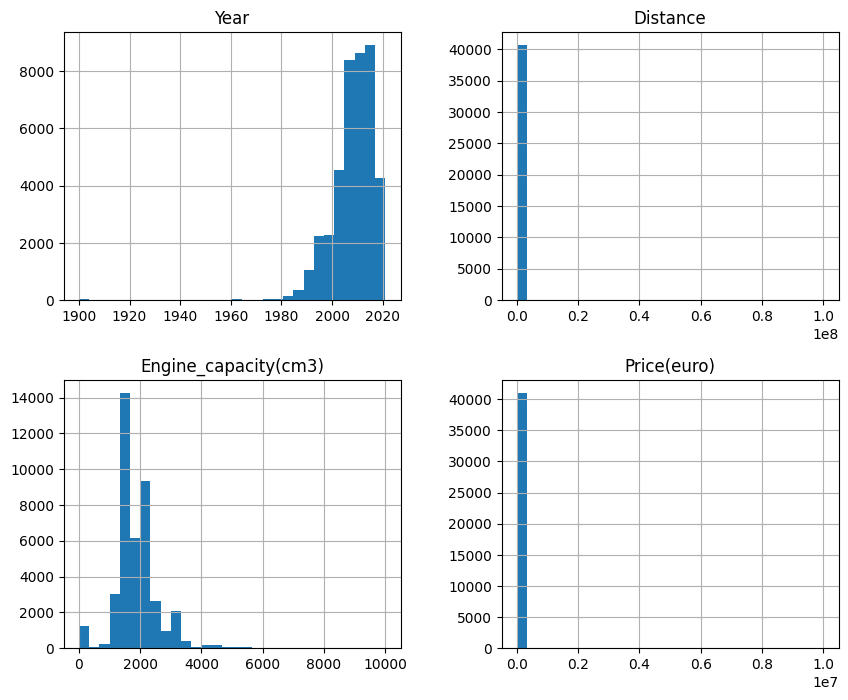

Количество удалённых строк: 1046


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('cars.csv')

# Построение гистограмм
df.hist(bins=30, figsize=(10, 8))
plt.show()

# Удаление аномальных значений с процессом вычисления границ для удаления аномалий
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_columns:
    upper_limit = df[col].mean() + 3 * df[col].std() #верхняя и нижняя граница для допустимых значений (ср. знач. +/- 3 стандартных отклонения).
    lower_limit = df[col].mean() - 3 * df[col].std()
    df = df[(df[col] <= upper_limit) & (df[col] >= lower_limit)] #непосредственно удаление аномальных значений

original_row_count = pd.read_csv('cars.csv').shape[0]
remaining_row_count = df.shape[0]
deleted_row_count = original_row_count - remaining_row_count

print(f"Количество удалённых строк: {deleted_row_count}")


Построение гистограмм для визуального анализа распределений по всем числовым колонкам производится с использованием df.hist() для анализа распределения, а plt.show() позволяет отобразить построенные графики с использованием библиотеки matplotlib.pyplot.

Для определения аномалий, которые следует удалить, в данном случае использован метод "3 сигм", который основывается на свойствах нормального распределения (Гауссово распределение), согласно которому около 99.7% всех значений находятся в пределах трёх стандартных отклонений (σ) от среднего значения (μ). Удаление аномальных значений заключается в "пересохранении" датафрейма с оставлением строк, которые в столбце содержат допустимые значения.

Оценка удалённых строк происходит посредством сравнивания количества строк до и после удаления аномалий. Разница между этими значениями определяет значение количества удалённых строк.


*Вопрос 4: Для набора данных Cars назовите самую распространенную
марку автомобилей (столбец Make).*

Ответ: Для решения данной задачи необходимо использовать команды, представленные в коде ниже.

In [ ]:
import pandas as pd

df = pd.read_csv('cars.csv')
counts = df.Make.value_counts()
counts

Make
Volkswagen      4304
Mercedes        3811
Toyota          3776
BMW             3221
Renault         2988
                ... 
Lamborghini        1
McLaren            1
Saturn             1
Aston Martin       1
Xpeng              1
Name: count, Length: 87, dtype: int64

На основе полученных результатов можно сделать вывод, что самая распространённая марка автомобилей - Volkswagen.

*Вопрос 5: Визуализируйте скаттерограмму для двух столбцов — Distance и Year — набора данных Cars с использованием столбца
Transmission в качестве цвета маркера (hue).
К какому типу Transmission относится точка, которая наиболее близка к координатам (Year = 1980, Distance = 500 000)?*

Ответ: Ниже представлен код, который позволяет визуализировать статтерограмму для заданных столбцов.

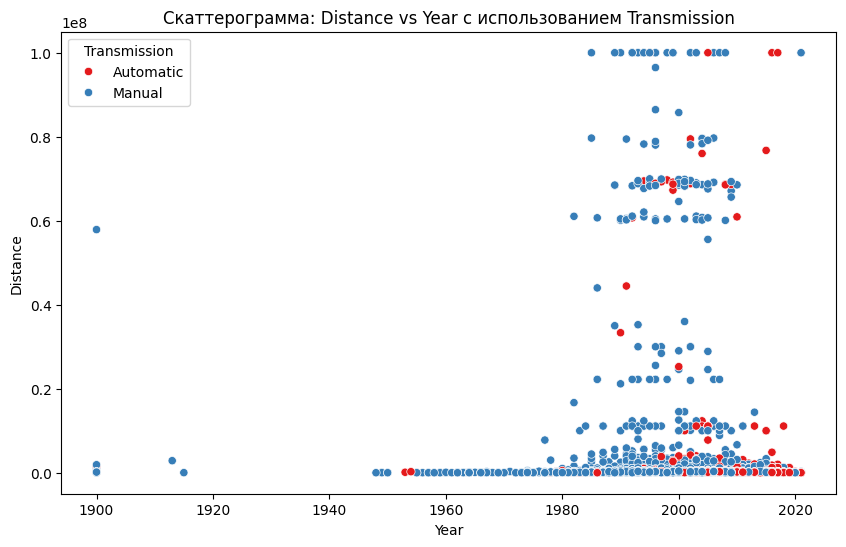

Точка, наиболее близкая к (Year = 1980, Distance = 500 000), относится к типу Transmission: Automatic


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('cars.csv')

# Построение скаттерограммы с установлением меток и заголовков
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x='Year', y='Distance', hue='Transmission', data=df, palette='Set1')
plt.title('Скаттерограмма: Distance vs Year с использованием Transmission')
plt.xlabel('Year')
plt.ylabel('Distance')
plt.show()


target_point = np.array([1980, 500000]) # Точка, наиболее близкая к заданным данным

# От каждой точки до целевой вычисляется евклидово расстояние
df['distance_to_target'] = np.sqrt((df['Year'] - target_point[0]) ** 2 + (df['Distance'] - target_point[1]) ** 2)

closest_point_idx = df['distance_to_target'].idxmin() # Индекс строки с min расстоянием до целевой точки

closest_transmission = df.loc[closest_point_idx, 'Transmission'] # Значение Transmission для строки с min расстоянием до целевой точки

print(f"Точка, наиболее близкая к (Year = 1980, Distance = 500 000), относится к типу Transmission: {closest_transmission}")


*Вопрос 6: Представим, что вы визуализировали некий набор данных (рис. 2.10 в МУ). Какие новые признаки, основанные на имеющихся, необходимо сконструировать, чтобы иметь возможность отделить все
красные точки от всех синих точек с помощью прямой линии?*

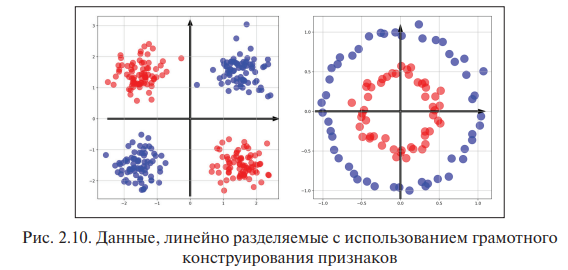

Ответ:

Для левого графика, на котором данные разделены на четыре четких кластера, можно использовать комбинации существующих признаков (например, их произведение или отношение), что позволит создать новые оси координат, вдоль которых кластеры будут расположены более линейно.

Для правого графика можно перейти от декартовых координат к полярным координатам или к признакам, которые описывают расстояние от центра посредством вычисления радикального расстояния каждой точки от центра, а в качестве нового признака использовать радиус. Таким образом, у красных точки радиус будет меньше, чем у синих, что позволит в пространстве нового признака провести линейную границу, которая отделит красные (внутренние) точки от синих (внешних).